# CH 7: Handling Missing Data

## Performing data quality checks

In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def read_dataset(folder, file, date_col=None):
    '''
    folder: is a Path object
    file: the CSV filename
    date_col: specify a date_col to use for index_col

    returns: a pandas DataFrame with DatetimeIndex
    '''

    df = pd.read_csv(folder / file, index_col=date_col, parse_dates=[date_col])
    return df


In [3]:
def plot_dfs(df1, df2, col, title=None, xlabel=None, ylabel=None):
    '''
    df1: original dataframe without missing data
    df2: dataframe with missing data
    col: column name that contains missing data
    '''
    df_missing = df2.rename(columns={col: 'missing'})

    columns = df_missing.loc[:, 'missing':].columns.tolist()
    subplots_size = len(columns)
    
    fig, ax = plt.subplots(subplots_size+1, 1, sharex=True)
    plt.subplots_adjust(hspace=0.25)
    fig.suptitle = title

    df1[col].plot(ax=ax[0], figsize=(10, 12))
    ax[0].set_title('Original Dataset')
    ax[0].set_xlabel(xlabel)
    ax[0].set_ylabel(ylabel)

    for i, colname in enumerate(columns):
        df_missing[colname].plot(ax=ax[i+1])
        ax[i+1].set_title(colname.upper())
    plt.show()

In [4]:
def rmse_score(df1, df2, col=None):
    '''
    df1: original dataframe wihtout missing data
    df2: dataframe with missing data
    col: column name that contains missing data
    returns: a list of scores
    '''
    df_missing = df2.rename(columns={col: 'missing'})
    columns = df_missing.loc[:, 'missing':].columns.tolist()
    scores = []
    for comp_col in columns[1:]:
        rmse = np.sqrt(np.mean((df1[col] - df_missing[comp_col])**2))
        scores.append(rmse)
        print(f'RMSE for {comp_col}: {rmse}')
    return scores

In [5]:
co2 = Path('../datasets/Ch7/co2_missing.csv')
#ecom = Path('../datasets/Ch7/clicks_missing.csv')
ecom = Path('../datasets/Ch7/clicks_missing_multiple.csv')
#co2_df = pd.read_csv(co2, index_col='year', parse_dates=True)
#ecom_df = pd.read_csv(ecom, index_col='date', parse_dates=True)
co2_df = pd.read_csv(co2, parse_dates=True)
ecom_df = pd.read_csv(ecom, parse_dates=True)
ecom_df.head()

,date,price,location,clicks
0,4/1/2008,43.155647,2.0,18784
1,4/2/2008,43.079056,1.0,24738
2,NaN,43.842609,NaN,15209
3,NaN,NaN,1.0,14018
4,NaN,43.941176,1.0,11974


In [6]:
co2_df.isna().sum()

year     0
co2     25
dtype: int64

In [7]:
ecom_df.isnull().sum()

date         4
price        1
location     1
clicks      14
dtype: int64

In [8]:
ecom_df.isnull().sum().sum()

20

In [9]:
ecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      131 non-null    object 
 1   price     134 non-null    float64
 2   location  134 non-null    float64
 3   clicks    121 non-null    object 
dtypes: float64(2), object(2)
memory usage: 4.3+ KB


In [10]:
co2_df.describe(include='all')

,year,co2
count,226.000000,201.000000
mean,1906.902655,1.590015
std,66.543281,1.644182
min,1750.000000,0.000000
25%,1851.250000,0.076400
50%,1907.500000,0.935100
75%,1963.750000,2.807600
max,2020.000000,4.907900


In [11]:
ecom_df.describe(include='all')

,date,price,location,clicks
count,131,134.000000,134.000000,121
unique,131,NaN,NaN,119
top,4/1/2008,NaN,NaN,?
freq,1,NaN,NaN,2
mean,NaN,43.480221,1.694030,NaN
std,NaN,0.610578,1.118724,NaN
min,NaN,42.207018,1.000000,NaN
25%,NaN,43.038050,1.000000,NaN
50%,NaN,43.498842,1.000000,NaN
75%,NaN,43.889935,2.000000,NaN


In [12]:
co2_df = co2_df.replace(0, np.NaN)
ecom_df = ecom_df.replace('?', np.NaN)
ecom_df['clicks'] = ecom_df['clicks'].astype('float')

In [13]:
co2_df.isnull().sum()

year     0
co2     35
dtype: int64

In [14]:
ecom_df.isnull().sum()

date         4
price        1
location     1
clicks      16
dtype: int64

In [15]:
co2_df = pd.read_csv(co2, keep_default_na=False)
co2_df.isna().sum()

year    0
co2     0
dtype: int64

In [16]:
co2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    226 non-null    int64 
 1   co2     226 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.7+ KB


In [17]:
co2_df.iloc[132:139]

,year,co2
132,1927,
133,1928,
134,1929,
135,1930,
136,1931,
137,1932,
138,1933,


## Handling missing data with univariate impuation using pandas

In [18]:
folder = Path('../datasets/Ch7')
co2_original = read_dataset(folder, 'co2_original.csv', 'year')
co2_missing = read_dataset(folder, 'co2_missing_only.csv', 'year')
clicks_original = read_dataset(folder, 'clicks_original.csv', 'date')
clicks_missing = read_dataset(folder, 'clicks_missing.csv', 'date')

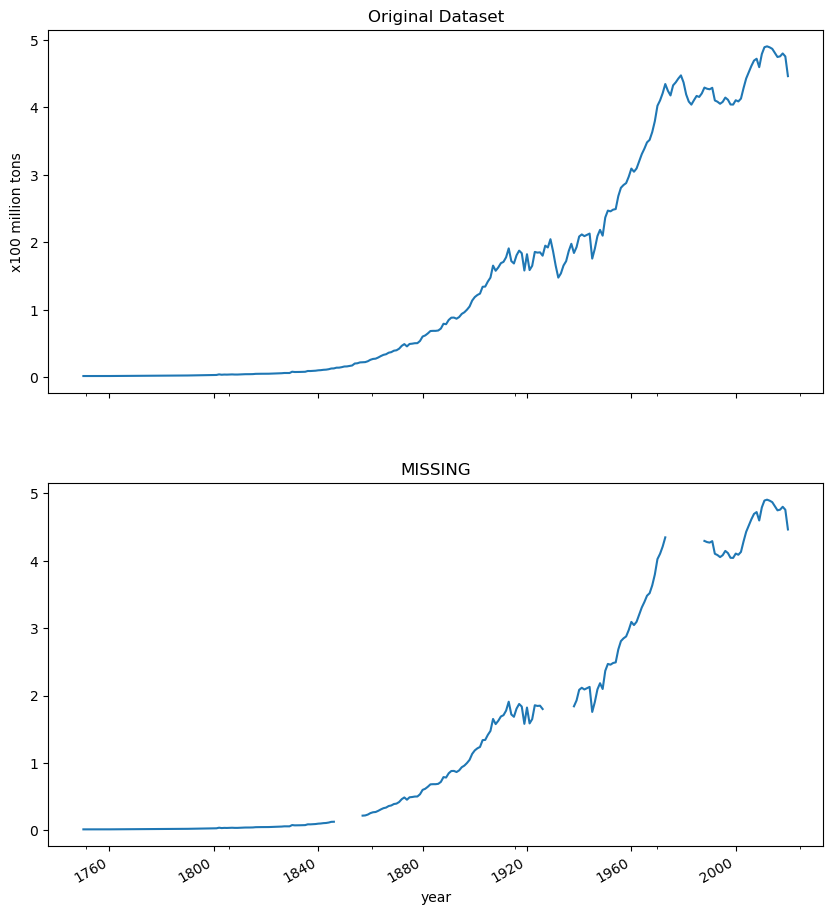

In [19]:
plot_dfs(co2_original, co2_missing, 'co2', 
         title="Annual CO2 Emission per Capita",
         xlabel="Years",
         ylabel="x100 million tons")

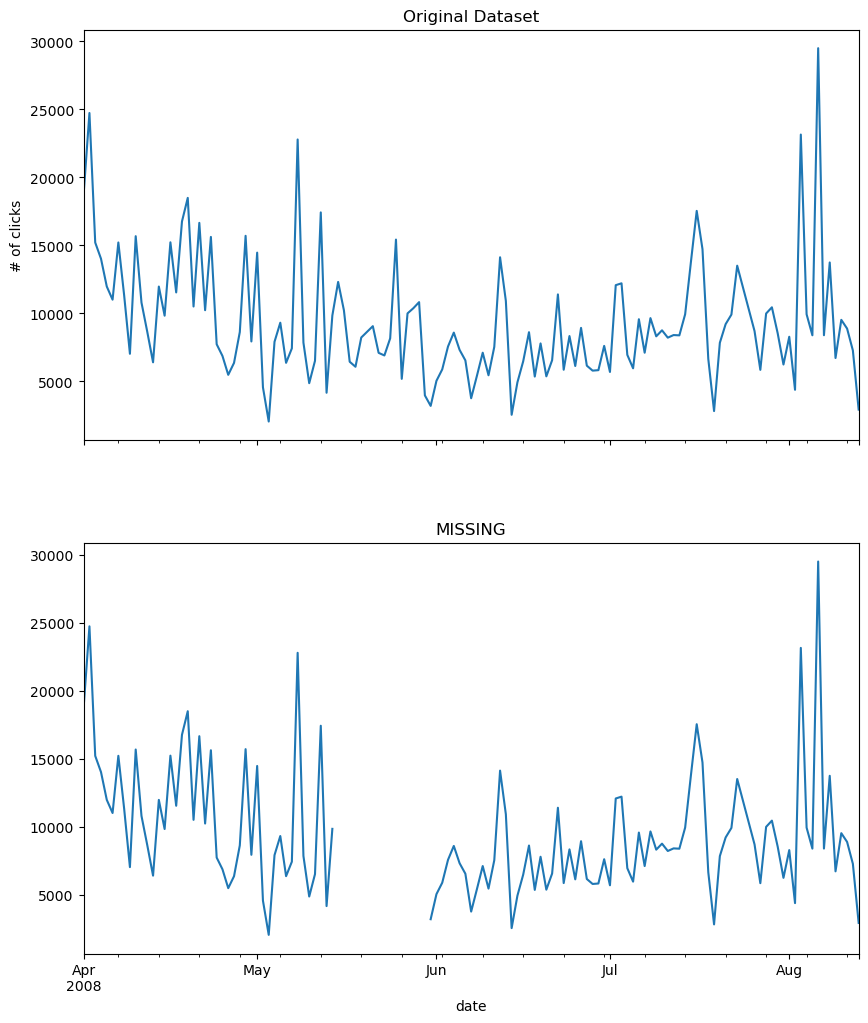

In [20]:
plot_dfs(clicks_original, clicks_missing, 'clicks',
         title="Page Clicks per Day",
         xlabel="date", ylabel="# of clicks")


In [21]:
co2_missing['ffil'] = co2_missing['co2'].ffill()
co2_missing['bfill'] = co2_missing['co2'].bfill()
co2_missing['mean'] = co2_missing['co2'].fillna(co2_missing['co2'].mean())

_ = rmse_score(co2_original, co2_missing, 'co2')

RMSE for ffil: 0.05873012599267133
RMSE for bfill: 0.05550012995280968
RMSE for mean: 0.7156383637041684


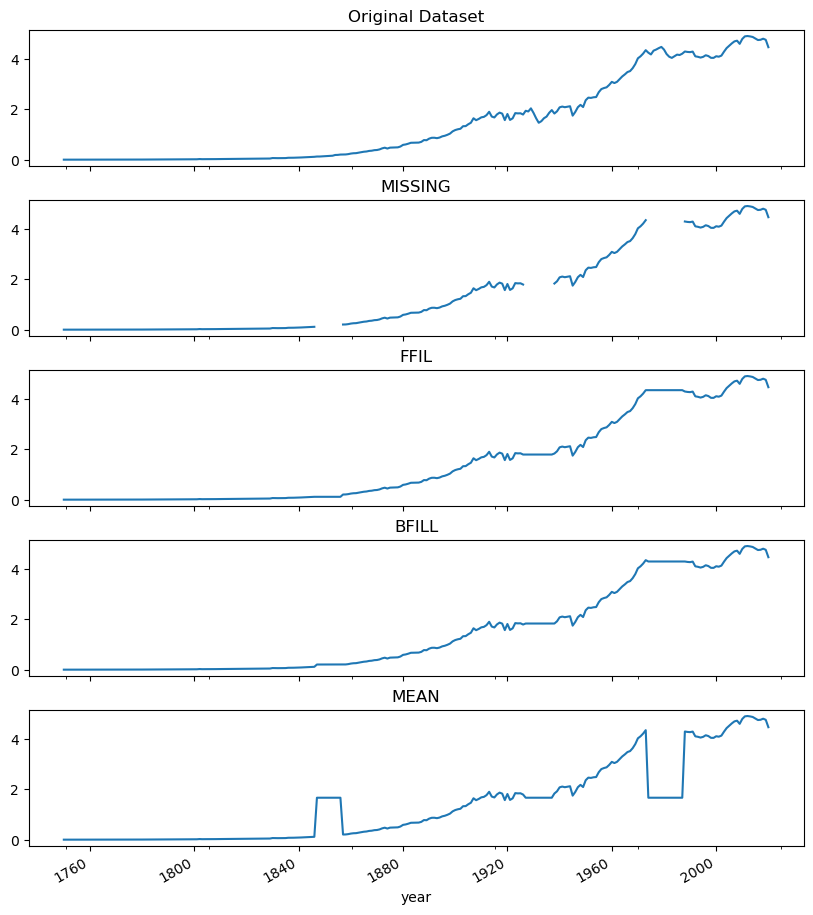

In [22]:
plot_dfs(co2_original, co2_missing, 'co2')

In [23]:
clicks_missing['ffill'] = clicks_missing['clicks'].ffill()
clicks_missing['bfill'] = clicks_missing['clicks'].bfill()
clicks_missing['mean'] = clicks_missing['clicks'].fillna(clicks_missing['clicks'].mean())

_ = rmse_score(clicks_original, clicks_missing, 'clicks')

RMSE for ffill: 1034.1210689204554
RMSE for bfill: 2116.6840489225033
RMSE for mean: 997.7600138929953


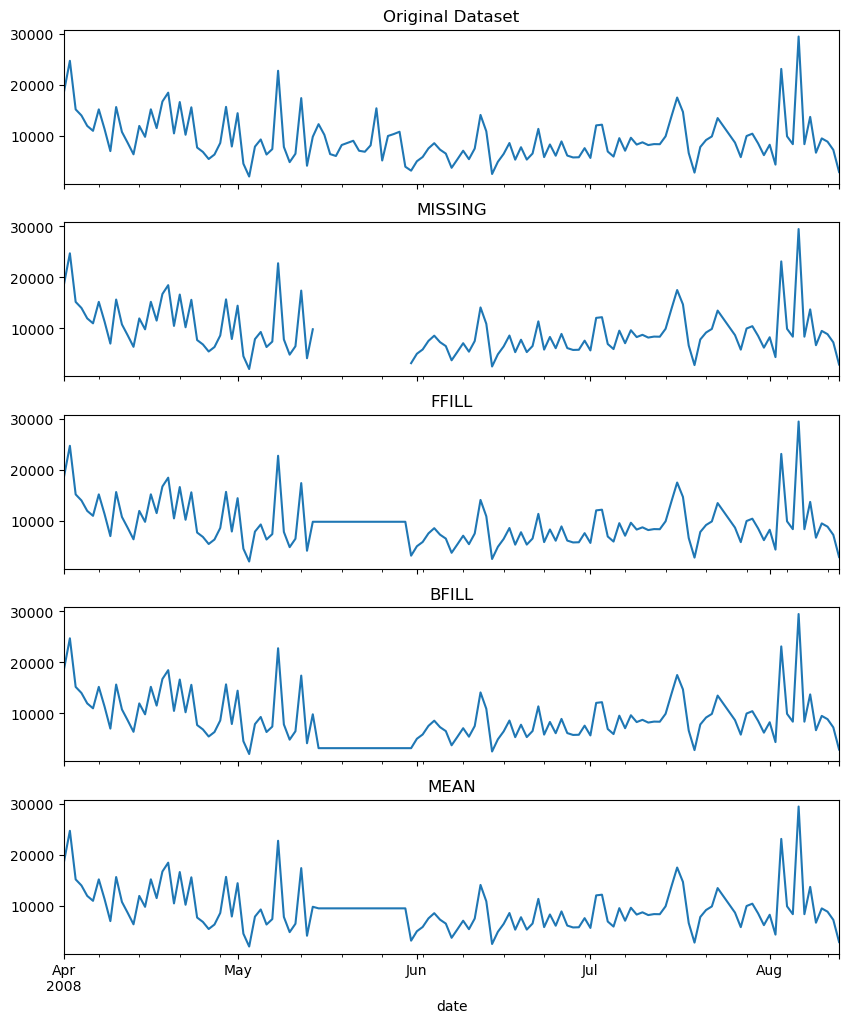

In [24]:
plot_dfs(clicks_original, clicks_missing, 'clicks')

## Handling missing data with univariate imputation using scikit-learn

In [25]:
from sklearn.impute import SimpleImputer

folder = Path('../datasets/Ch7/')
co2_original = read_dataset(folder, 'co2_original.csv', 'year')
co2_missing = read_dataset(folder, 'co2_missing_only.csv', 'year')
clicks_original = read_dataset(folder, 'clicks_original.csv', 'date')
clicks_missing = read_dataset(folder, 'clicks_missing.csv', 'date')

In [26]:
strategy = [
    ('Mean Strategy', 'mean'),
    ('Median Strategy', 'median'),
    ('Most Frequent Strategy', 'most_frequent')]


In [27]:
co2_vals = co2_missing['co2'].values.reshape(-1, 1)
clicks_vals = clicks_missing['clicks'].values.reshape(-1, 1)
for s_name, s in strategy:
    co2_missing[s_name] = (SimpleImputer(strategy=s).fit_transform(co2_vals))
    clicks_missing[s_name] = (SimpleImputer(strategy=s).fit_transform(clicks_vals))

In [28]:
_ = rmse_score(co2_original, co2_missing, 'co2')

RMSE for Mean Strategy: 0.7156383637041684
RMSE for Median Strategy: 0.802942160685986
RMSE for Most Frequent Strategy: 1.1245663822743381


In [29]:
_ = rmse_score(clicks_original, clicks_missing, 'clicks')

RMSE for Mean Strategy: 997.7600138929953
RMSE for Median Strategy: 959.3580492530756
RMSE for Most Frequent Strategy: 1097.6425985146868


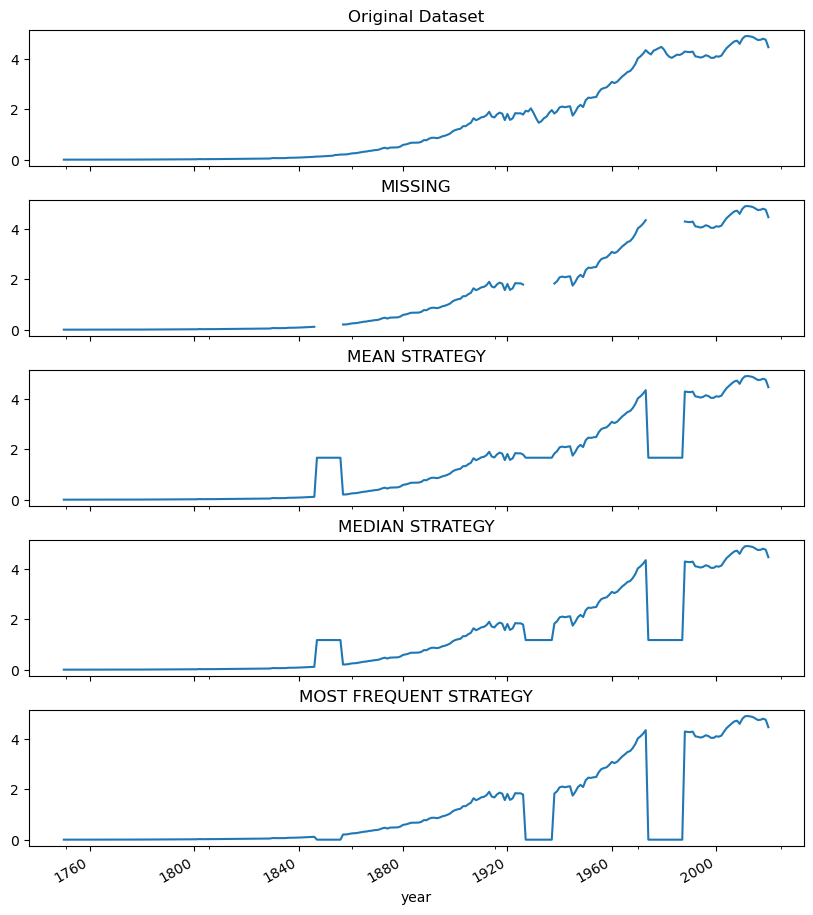

In [30]:
plot_dfs(co2_original, co2_missing, 'co2')

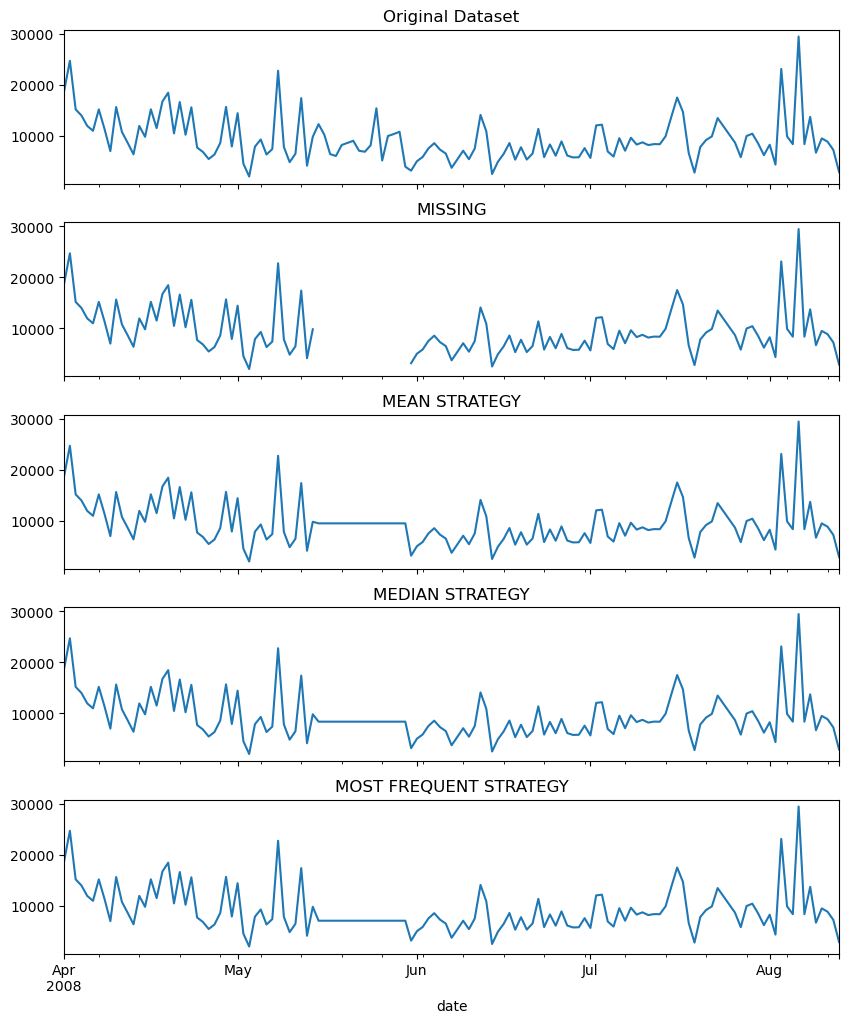

In [31]:
plot_dfs(clicks_original, clicks_missing, 'clicks')

## Handling missing data with multivariate imputation

In [32]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor, BaggingRegressor
from sklearn.linear_model import ElasticNet, LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [33]:
folder = Path('../datasets/Ch7/')
clicks_original = read_dataset(folder, 'clicks_original.csv', 'date')
clicks_missing = read_dataset(folder, 'clicks_missing.csv', 'date')

In [34]:
estimators = [('extra_trees', ExtraTreesRegressor(n_estimators=10)),
             ('bagging', BaggingRegressor(n_estimators=10)),
             ('elastic_net', ElasticNet()),
             ('linear_regression', LinearRegression()),
             ('knn', KNeighborsRegressor(n_neighbors=3))]

In [35]:
clicks_vals = clicks_missing.iloc[:, 0:3].values
for e_name, e in estimators:
    est = IterativeImputer(random_state=15, estimator=e).fit(clicks_vals)
    clicks_missing[e_name] = est.transform(clicks_vals)[:, 2]

C:\Users\rick\AppData\Local\anaconda3\envs\timeseries\lib\site-packages\sklearn\impute\_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
C:\Users\rick\AppData\Local\anaconda3\envs\timeseries\lib\site-packages\sklearn\impute\_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [36]:
_ = rmse_score(clicks_original, clicks_missing, 'clicks')

RMSE for extra_trees: 1348.9865774529217
RMSE for bagging: 1245.3786562059481
RMSE for elastic_net: 945.4075209343099
RMSE for linear_regression: 938.9419831427186
RMSE for knn: 1336.8798392251822


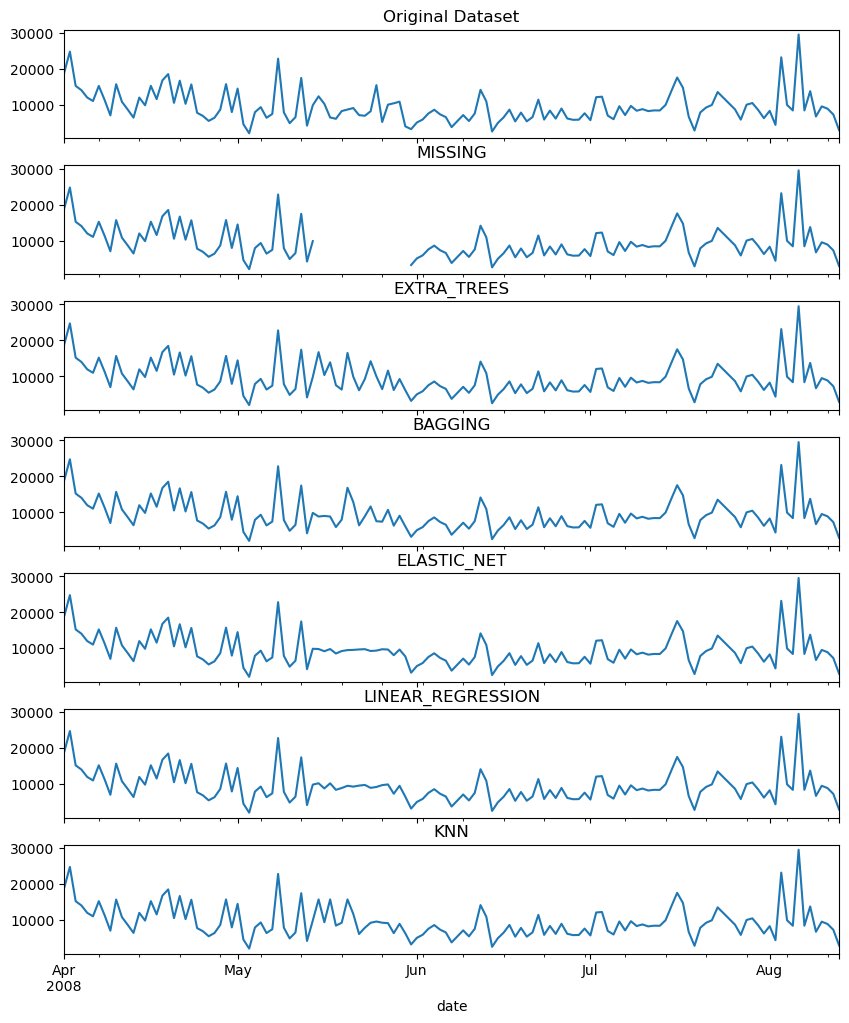

In [37]:
plot_dfs(clicks_original, clicks_missing, 'clicks')

In [38]:
from statsmodels.imputation.mice import MICE, MICEData, 
MICEResults
import statsmodels.api as sm

In [39]:
fltr = ['price', 'location', 'clicks']
mice_data = MICEData(clicks_missing[fltr], perturbation_method='gaussian')
# 20 iterations
mice_data.update_all(n_iter=20)
mice_data.set_imputer('clicks', formula='~ price + location', model_class=sm.OLS)

In [40]:

clicks_missing['MICE'] = mice_data.data['clicks'].values.tolist()
_ = rmse_score(clicks_original, clicks_missing, 'clicks')

RMSE for extra_trees: 1348.9865774529217
RMSE for bagging: 1245.3786562059481
RMSE for elastic_net: 945.4075209343099
RMSE for linear_regression: 938.9419831427186
RMSE for knn: 1336.8798392251822
RMSE for MICE: 2052.7639758970686


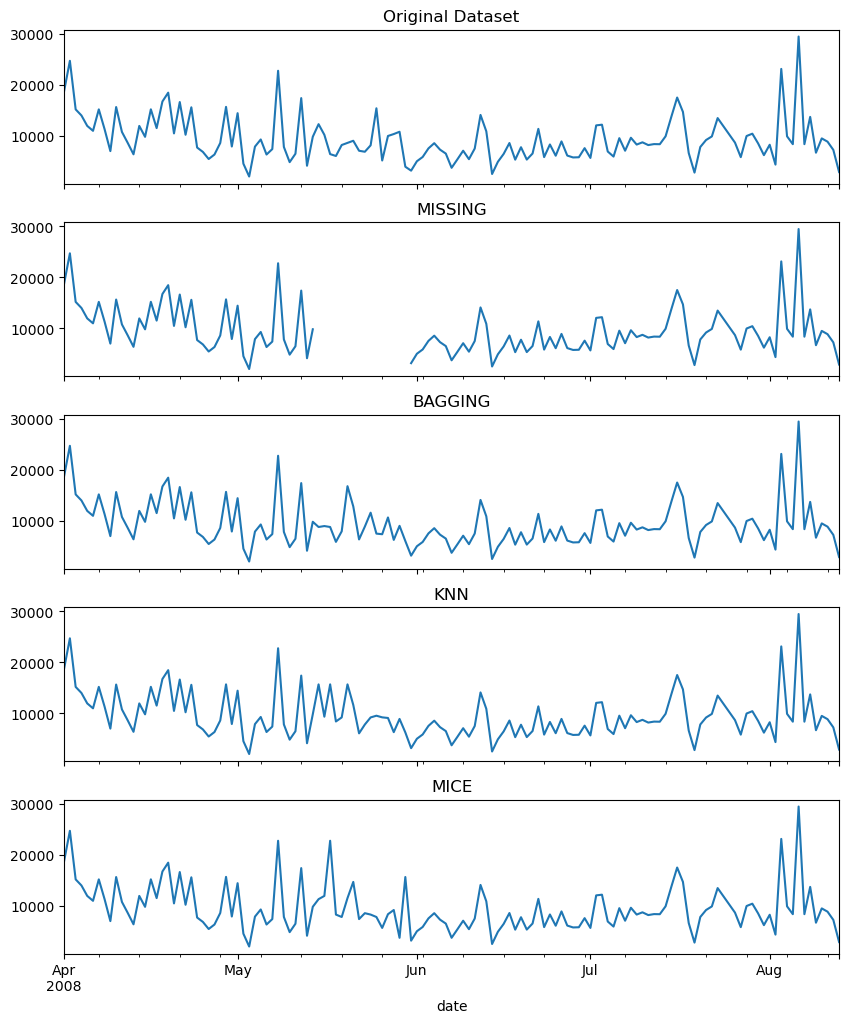

In [41]:
cols = ['clicks','bagging','knn', 'MICE']
plot_dfs(clicks_original, clicks_missing[cols], 'clicks')

## Handling missing data with interpolation

In [42]:
folder = Path('../datasets/Ch7/')
co2_original = read_dataset(folder, 'co2_original.csv', 'year')
co2_missing = read_dataset(folder, 'co2_missing_only.csv', 'year')
clicks_original = read_dataset(folder, 'clicks_original.csv', 'date')
clicks_missing = read_dataset(folder, 'clicks_missing.csv', 'date')

In [44]:
interpolations = ['linear', 'quadratic', 'nearest', 'cubic']
for intp in interpolations:
    co2_missing[intp] = co2_missing['co2'].interpolate(method=intp)
    clicks_missing[intp] = clicks_missing['clicks'].interpolate(method=intp)

In [49]:
co2_missing['spline'] = \
    co2_missing['co2'].interpolate(method='spline', order=2)
clicks_missing['spline'] = \
    clicks_missing['clicks'].interpolate(method='spline', order=2)

co2_missing['polynomial'] = \
    co2_missing['co2'].interpolate(method='polynomial', order=5)
clicks_missing['polynomial'] = \
    clicks_missing['clicks'].interpolate(method='polynomial', order=5)

In [50]:
_ = rmse_score(co2_original, co2_missing, 'co2')

RMSE for linear: 0.05507291327761665
RMSE for quadratic: 0.08367561505614347
RMSE for nearest: 0.05385422309469095
RMSE for cubic: 0.08373627305833133
RMSE for spline: 0.1878602347541416
RMSE for polynomial: 0.06728323553134928


In [51]:
_ = rmse_score(clicks_original, clicks_missing, 'clicks')

RMSE for linear: 1329.1448378562811
RMSE for quadratic: 5224.641260626975
RMSE for nearest: 1706.1853705030173
RMSE for cubic: 6199.304875782831
RMSE for spline: 5222.922993448641
RMSE for polynomial: 56757.293236471276


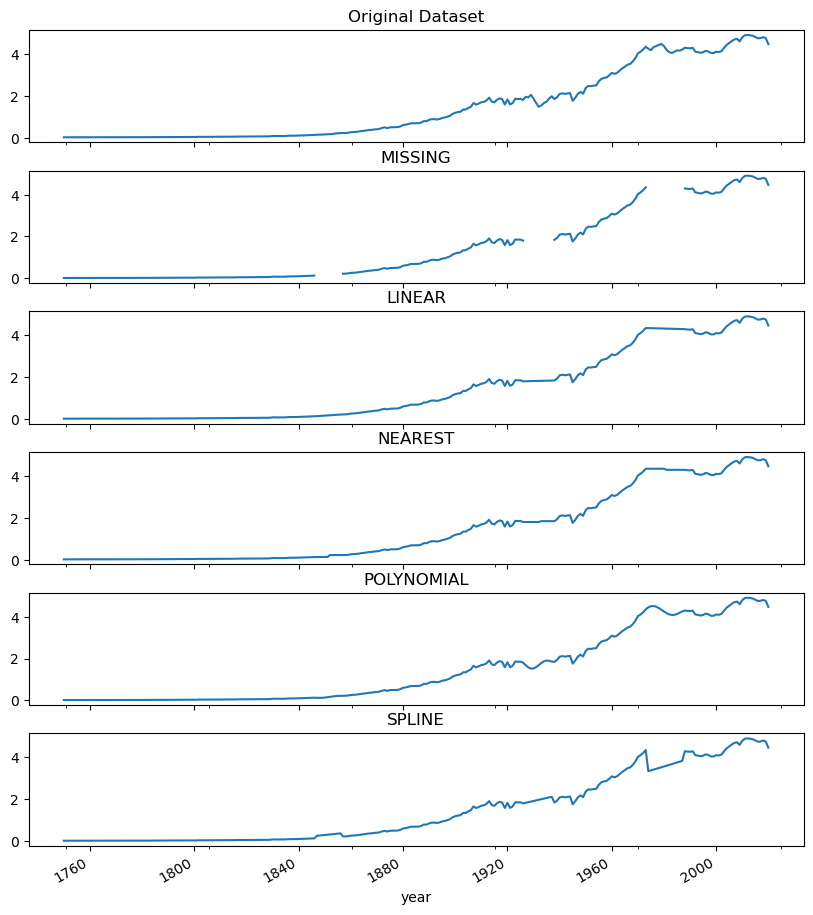

In [53]:
cols = ['co2', 'linear', 'nearest', 'polynomial', 'spline']
plot_dfs(co2_original, co2_missing[cols], 'co2')

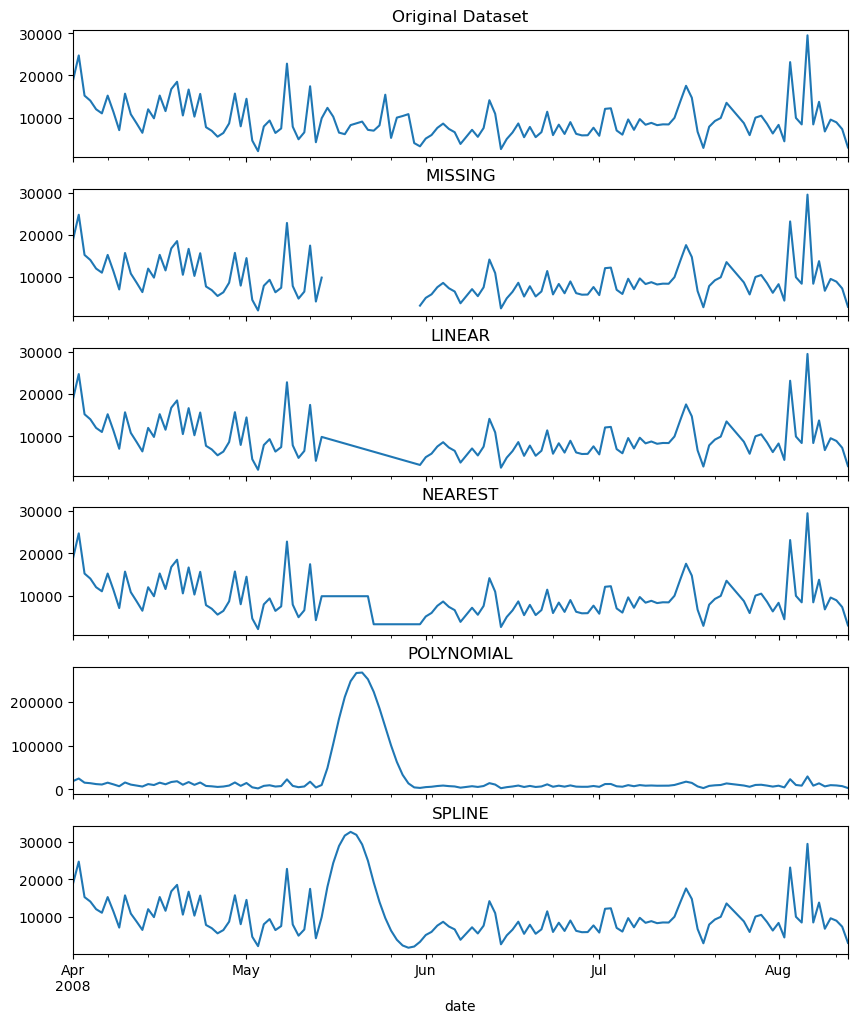

In [54]:
cols = ['clicks', 'linear', 'nearest', 'polynomial', 'spline']
plot_dfs(clicks_original, clicks_missing[cols], 'clicks')